In [2]:
import os,sys
sys.path.insert(0, '../')

import numpy as np
from scipy import misc
from common import common
from common import util
from director import vtkAll as vtk
import yaml
import time
from director import vtkNumpy as vnp
from director import filterUtils
from RGBDCNN import network
import matplotlib.pyplot as plt
from vtk.util import numpy_support
import os
import glob
import pandas as pd



path = '/media/drc/DATA/chris_labelfusion/logs_final/'
files = os.listdir(path)
real = glob.glob(path+"*realdepth*")
mysim = glob.glob(path+"*depthsim*")
othersim = glob.glob(path+"*kunidepth*")
sim = glob.glob(path+"*_sim*")
print len(sim),len(othersim),len(mysim),len(real)
df = pd.DataFrame(index=["Pefect Sim","Simple NDP Prediction","DeepSim","Real World"], columns=["Euclidean Error Mean","Euclidean Error Variance","Rotational Error Mean","Rotational Error Variance"])

for i,l in zip([real,mysim,othersim,sim],["Pefect Sim","Simple NDP Prediction","DeepSim","Real World"]):
    edistances = []
    rdistances = []
    for j in i:
        with open(j, 'r') as stream:
            dic = yaml.load(stream)
            ground_truth_pose, post_icp_pose = (dic['ground_truth_pose'], dic['post_icp_pose'])
        for key in ground_truth_pose.keys():
            try:
                pos1 = np.array(ground_truth_pose[key][0])
                pos2 = np.array(post_icp_pose[key][0])
                quat1 = np.array(ground_truth_pose[key][1])
                quat2 = np.array(post_icp_pose[key][1])
                edistances.append(np.linalg.norm(pos1-pos2))
                rdistances.append(1-np.dot(quat1,quat2))
            except:
                print "error"
                pass

    print "mean ecludian distance ",np.mean(edistances)
    print "variance ecludian distance ", np.var(edistances)
    print "mean rotational distance ", np.mean(rdistances)
    print "variance rotational distance " ,np.var(rdistances)
    p= ["Euclidean Error Mean","Euclidean Error Variance","Rotational Error Mean","Rotational Error Variance"]

    df.loc[l,p[0]] = np.mean(edistances)
    df.loc[l,p[1]] = np.var(edistances)
    df.loc[l,p[2]] = np.mean(rdistances)
    df.loc[l,p[3]] = np.var(rdistances)

df



9 9 9 9
mean ecludian distance  0.012924573780330668
variance ecludian distance  5.658193455652721e-05
mean rotational distance  0.02926166907145092
variance rotational distance  0.07308912214329205
mean ecludian distance  0.013254597420795563
variance ecludian distance  0.00010201402374581834
mean rotational distance  0.029165817313605798
variance rotational distance  0.07309421089234715
mean ecludian distance  0.012069324392859668
variance ecludian distance  4.1070896676317444e-05
mean rotational distance  0.029239101238921757
variance rotational distance  0.07308984381339936
mean ecludian distance  0.011941886811611355
variance ecludian distance  4.099713867331884e-05
mean rotational distance  0.02929929576915067
variance rotational distance  0.0730871833821966


,Euclidean Error Mean,Euclidean Error Variance,Rotational Error Mean,Rotational Error Variance
Pefect Sim,0.0129246,5.65819e-05,0.0292617,0.0730891
Simple NDP Prediction,0.0132546,0.000102014,0.0291658,0.0730942
DeepSim,0.0120693,4.10709e-05,0.0292391,0.0730898
Real World,0.0119419,4.09971e-05,0.0292993,0.0730872


In [8]:
path = '/media/drc/DATA/chris_labelfusion/logs/'
files = os.listdir(path)
real = np.sort(glob.glob(path+"*realdepth*"))
mysim = np.sort(glob.glob(path+"*depthsim*"))
othersim = np.sort(glob.glob(path+"*kunidepth*"))
sim = np.sort(glob.glob(path+"*_sim*"))
df = pd.DataFrame(index=["Pefect Sim","Simple NDP Prediction","DeepSim"], columns=["Euclidean Error Mean","Euclidean Error Variance","Rotational Error Mean","Rotational Error Variance"])
print len(sim)-1
for i in range(len(sim)-1):
    edistances = []
    rdistances = []
    dic = {}
    with open(real[i], 'r') as stream:
        dic = yaml.load(stream)
    real_ground_truth_pose, realpost_icp_pose = (dic['ground_truth_pose'], dic['post_icp_pose'])
    for j,l in zip([sim,othersim,mysim],["Pefect Sim","Simple NDP Prediction","DeepSim"]):
        with open(j[i], 'r') as stream:
            dic1 = yaml.load(stream)
            ground_truth_pose, post_icp_pose = (dic1['ground_truth_pose'], dic1['post_icp_pose'])
            for key in ground_truth_pose.keys():
                try:
                    pos1 = np.array(realpost_icp_pose[key][0])
                    pos2 = np.array(post_icp_pose[key][0])
                    quat1 = np.array(realpost_icp_pose[key][1])
                    quat2 = np.array(post_icp_pose[key][1])
                    edistances.append(np.linalg.norm(pos1-pos2))
                    rdistances.append(1-np.dot(quat1,quat2))
                except:
                    print "error"
                    pass

        p= ["Euclidean Error Mean","Euclidean Error Variance","Rotational Error Mean","Rotational Error Variance"]

        df.loc[l,p[0]] = np.mean(edistances)
        df.loc[l,p[1]] = np.var(edistances)
        df.loc[l,p[2]] = np.mean(rdistances)
        df.loc[l,p[3]] = np.var(rdistances)

df

9


,Euclidean Error Mean,Euclidean Error Variance,Rotational Error Mean,Rotational Error Variance
Pefect Sim,0.242519,0.00938523,0.682543,0.203164
Simple NDP Prediction,0.122779,0.0190309,0.341494,0.217897
DeepSim,0.0824377,0.0159427,0.22792,0.171063


                      Euclidean Error Mean Euclidean Error Variance  \
Pefect Sim                             NaN                      NaN   
Simple NDP Prediction                  NaN                      NaN   
DeepSim                                NaN                      NaN   
Real World                       0.0119419              4.09971e-05   

                      Rotational Error Mean Rotational Error Variance  
Pefect Sim                              NaN                       NaN  
Simple NDP Prediction                   NaN                       NaN  
DeepSim                                 NaN                       NaN  
Real World                        0.0292993                 0.0730872  


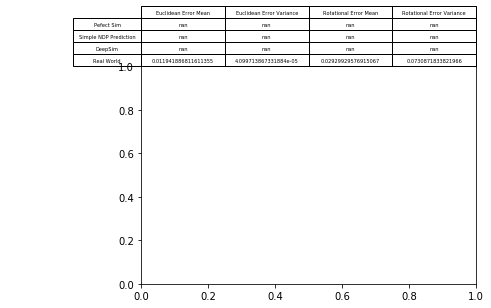

In [3]:
print df
plt.table(cellText=df.values,
          rowLabels=df.index,
          colLabels=df.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='top')
#fig = plt.gcf()

plt.show()